In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

import concurrent.futures 

## Group Assignment
### Team Number: 08
### Team Member Names: Vanessa Liu, Ethan Liu, Justin Hui
### Team Strategy Chosen: SAFE

# Introduction

For this CFM 101 group assignment, our team had decided to target the safest portfolio where our goal is to get an ending value closest to zero after subtracting the starting $100,000 from the final portfolio value on December 6, 2021. Applying the knowledge and techniques learned from class, tutorials and other assignments, we developed a strategy to create the safest portfolio we could through methods of filtering through the given stock list.


### Non-Systematic (Non-Market) Risk

Risk can be described as the possibility of the actual investment outcome differing from the expected outcome. Risk increases as there are more variable possible outcomes that can occur. There are several types of risk such as inflation rate risk, liquidity risk, business risk, default risk, foreign exchange risk, and so on. For the purpose of this assignment, we investigate ways to minimize one part of the total risk - non-systematic or non-market risk. This is the variability of a security’s total returns that are NOT related to the overall market’s variability and is instead unique to a specific security. Investors can diversify their portfolio in attempts to decrease non-market risk, as opposed to the systematic or market risk which an investor can not control no matter how much they diversify. If the stock market suddenly drops, many stocks will be negatively affected, and vice versa, if the stock market rises, most will increase in value.

The concept of diversification involves crafting a well-balanced and varied collection of investments which will yield higher returns and also decrease risk by investing in these different elements. There are several techniques to diversify a portfolio, including how each stock is weighted, owning stocks from different industries and countries, and having non-correlated investments. To be able to understand risk, we have to quantify and measure it with tools like standard deviation, correlation and beta. Diversification is important as non-systematic risks such as a CEO scandal can impact investors' relations with the company and thus affect the price of a stock. When we invest in three securities rather than one then we can eliminate the risk specific to that one firm. Our code plays a large role in ensuring that we have stocks that go in the opposite directions to neutralize the impact.


# Initial Preparation and Filtering

Before deciding what stocks to use and implementing a strategy to create our final portfolio, we had some provided rules and guidelines so there had to be some basic filtering done.

We start by reading in the provided csv file to obtain the possible given tickers we could include in our safe portfolio and create a dataframe containing just the tickers. As the file has a ticker as the index of the column, we made sure to extract it and also include that into our dataframe, so we get this ticker first before appending the others.

To begin the basic filtering, we first had to check that we are only looking through valid stocks, those that are denominated in USD, elements that aren’t Crypto Assets and stocks that have an average daily volume of at least 10,000 shares, calculated from July 02, 2021 to October 22, 2021. So, we created a function called “stock_filter” that does all our basic filtering.  We used threading to run the function on each stock in our ‘ticker_list’ to store the valid stocks we will investigate in a  ‘valid_list’. This ‘valid_list’ is filtered again to remove all the “empty” instances into our finalized ‘filter_list’. Finally, we create a DataFrame called ‘filtered_df’ that would include our final basic filtered list of tickers so that we can further analyze each stock.

Crypto Assets have high volatility due to it still being at a very nascent stage compared to other forms of investment tools and currency. Due to the high volatility associated with Crypto Assets, our portfolio will filter out the crypto industry due to the associated risks it processes. When deciding what stocks to include, predictability is very important and thus some industries are excluded or filtered out to meet our desired portfolio.

In [2]:
#Reading csv file
tickers = pd.read_csv('Tickers.csv')
tickers.head()

#Note that the first element of the csv file became the index of 
#the column, so we will want to extract that ticker (in case we 
#want to use it)

,AAPL
0,ABBV
1,LOW
2,AUST
3,HOOD
4,INVALIDTIC


In [3]:
# Getting all the tickers in a list

#Setting the first ticker, which became the index, into the first element of the list
ticker_list = [tickers.columns[0]]

#Appending the rest of the tickers into the list
for i in range(len(tickers)):
    ticker_list.append(tickers.iloc[i,0])

In [4]:
# The function 'stock_filter' does the basic filtering required on the given list of 
# stocks in the csv file. 

def stock_filter(stock):
        
    ticker = yf.Ticker(stock)
    ticker_info = ticker.info
    
    #Checking if the ticker name is valid
    if ticker_info['regularMarketPrice'] != None:
        
        # get the ticker history
        ticker_hist = ticker.history(start=filter_start_date, end=filter_end_date)
       
        #If it is a valid stock, check currency, volume and market
        if (ticker_info['currency'] == 'USD' and (np.mean(ticker_hist['Volume']) >= 10000) and ticker_info['market'] == 'us_market'):
            return stock
    
    #If it fails any of the checks, we return empty
    return "empty"

In [5]:
#Selecting appropriate start/end dates for filtering
#as given in the assignment
filter_start_date = '2021-07-02'
filter_end_date = '2021-10-22'

#Creating list for valid filters
valid_list = []

# Use threading to filter our ticker_list
with concurrent.futures.ThreadPoolExecutor() as executor:
    
    #Applying stock_filter on every element of ticker_list
    results = executor.map(stock_filter, ticker_list)
    
    #Adding the results to the valid_list
    for result in results:
        valid_list.append(result)
   

In [6]:
# Filter the valid list to remove all "empty"

# Creating finalized filtered list
filter_list = []

# iterate through all items in 'valid_list'
# and removing the 'empty's so we are left
# with only valid tickers to choose from
for i in range(len(valid_list)):
    if valid_list[i] != "empty":
        filter_list.append(valid_list[i])
        

In [7]:
#Creating a dataframe with our final filtered list of tickers
filtered_df = pd.DataFrame({'Tickers': pd.Series(filter_list)})

#Checking the head of our new dataframe
filtered_df.head()

,Tickers
0,AAPL
1,ABBV
2,LOW
3,HOOD
4,AMZN


# Setup

We first needed to decide on a time interval to do all our analysis on and wanted a rather stable trend without abrupt spikes or decline in the market. The financial market was heavily impacted by the COVID-19 pandemic as it caused a great stock market crash, so we looked into this further by creating a graph and seeing how the trends looked around the time. To do this, we grabbed several tickers from different industries to get a general representation of the overall market and chose a test start and end date from before and after the pandemic, which was from January 1, 2018, to November 10, 2021. 

It is crucial to select the right dates to analyze as the economy is recovering and is more stable. During the start of the pandemic, some companies experienced a much greater shock than others. In other words, some industries faced a drastic downfall in the value of their shares while others remained stable. For example, telecommunication companies remained pretty stable as before the pandemic as telephone communication remained essential in a time where there were significant restrictions to travel and face-to-face communication. On the other hand, industries such as entertainment and travel (e.g. Airlines) faced a dramatic drop in share prices due to business not being able to be carried out. Thus, it is important to analyze the data before and after the pandemic when business is going back to normal. Regardless, the pandemic has permanently left a mark on some hard-hit industries as they continue to face a hard time so we must be careful and take extra caution when analyzing. 

We initiate the figure size for the plot and adjust the S&P 500 because it is significantly higher than the other stocks so we decided to divide by 20 to get an appropriate scale. This way, we can analyze changes in price in terms of percentage to get a better visualization without the S&P obscuring the pattern.

Now, we can create a plot including each of our assorted chosen stocks’ close prices on the same graph. Looking at the created graph, we realize that indeed there was a time where all stock prices for each representing industry stock experienced an abrupt, steep decline around March of the year 2020. Knowing this extra variable caused by the pandemic, we did not want to investigate that time period and so decided on a start date to refer to for the rest of the filtering which was April of 2020 up until the end of October for 2021, the end date. We store these as the ‘stdclose_start_date’ (April 1, 2020) and ‘stdclose_end_date’  (October 31, 2021) which we will use for our investigation with standard deviation and close prices.


In [8]:
#Looking at data from 2018-2021 for trends
#(specifically the impact of the pandemic)
test_start_date = '2018-01-01'
test_end_date = '2021-11-10'

#Adding tickers for S&P 500, Apple, G&E, Fedex, JP Morgan and Chevron
#Basically various random stocks I can think of in various industries
testlist = []
testlist_tickers = ['^GSPC','AAPL','GE','FDX','JPM','CVX','JNJ']

for i in range(len(testlist_tickers)):
    testlist.append(yf.Ticker(testlist_tickers[i]).history(start = test_start_date, end = test_end_date))

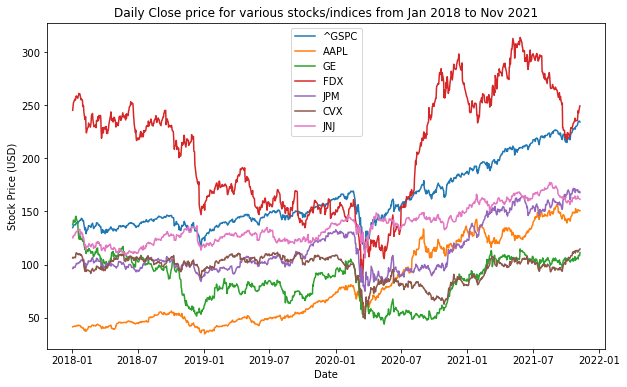

In [9]:
#Giving appropriate figure size
plt.figure(figsize=(10,6))

#Plotting portfolio values (Note that the value
#of the S&P 500 is much higher than the other stocks,
#so we divide by 20 to get appropriate scale relative 
#to the other stocks (as we are looking at this to 
#analyze drops in price (percentage wise) if we scale 
#down all of S&P close prices by the same factor, 
#we still get a good picture))
plt.plot(testlist[0].index, testlist[0].Close/20, label=testlist_tickers[0])
for i in range(len(testlist)-1):
    plt.plot(testlist[i+1].index, testlist[i+1].Close,  label=testlist_tickers[i+1])

#Formatting plot
plt.title('Daily Close price for various stocks/indices from Jan 2018 to Nov 2021')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend(loc='best')


#Displaying graph
plt.show()

# Analyzing Standard Deviation and Correlation

###  Looking at Standard Deviations

Standard deviation is a crucial, very important and common statistical measure of risk as it measures how much data disperses around a mean. A higher standard deviation means more fluctuations and the data is above the mean by more on average. In terms of price movement, a higher standard deviation means an investment will be riskier since the movement is not as predictable and can fluctuate greatly. Meanwhile, a low standard deviation denotes a calmer price and movement so there is lower risk.

As standard deviation is a very informative and reliable source of risk measurement, we start by getting the standard deviation of the percentage change of close prices for each stock in our basic filtered ‘stock_list’. This is done in our function “get_std” which produces a list of all the calculated std’s. We then call the function passing in our filtered list and add the series to a new column in the dataframe with the corresponding tickers. 

In [10]:
#Using the dates we got from above for our 
#standard deviation and close price functions
stdclose_start_date = '2020-04-01'
stdclose_end_date = '2021-10-31'

In [11]:
#Getting the standard deviation of a stock
#for data in the dates above, multiplying by
#100 to get a percent value and not decimal

def stock_std(stock):
    ticker = yf.Ticker(stock)
    tickhist = ticker.history(start = stdclose_start_date, end = stdclose_end_date)
    return tickhist.Close.pct_change().std()*100

In [12]:
# Get standard deviation for each ticker

# The function 'get_std' takes in a list of stocks 'stock_list' 
# and applies stock_std on all of them, before appending the
# standard deviations to the newly created std_list and returning
# that list, thus giving as a list of the stds of all the stocks
# in stock_list. Threading is used to try and make it faster. 

def get_std(stock_list):

    std_list = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(stock_std, stock_list)
    
        for result in results:
            std_list.append(result)
    
    return std_list

#Getting the standard deviation for
#each of our filtered stocks and putting it
#into our filtered_df dataframe.
filtered_df['Stds'] = pd.Series(get_std(filter_list))
filtered_df.head()

,Tickers,Stds
0,AAPL,1.997535
1,ABBV,1.485566
2,LOW,1.809771
3,HOOD,8.794322
4,AMZN,1.906305


With this added standard deviation to our ‘filtered_df’ DataFrame, we then want to take the 5 stocks with the smallest std’s. Without changing our original ‘filtered_df’, we store the indexes of these in an ‘indlist’ array which will accumulate all the indexes of our final desired stocks. Similarly, we have a ‘stocklist’ array to store the actual tickers of these 5 smallest stds that will also have later additions as we continue to filter through. We want to store these since we know these stocks are significant as they will contribute to a safer portfolio by having lower close percentage change standard deviations which implies they are less risky stocks.


In [13]:
#NEW CODE 
#As mentioned above, we want to select stocks that 
#have lower standard deviations, so we want to avoid stocks 
#that have super high (in this case we chose std > 4). So
#here we remove those stocks, reset the index and remove
#the old indices
filtered_df = filtered_df[filtered_df.Stds < 4]
filtered_df.reset_index(inplace=True)
filtered_df = filtered_df.drop(['index'], axis=1)

#Additionally, we have to update filter_list
filter_list = filtered_df.Tickers.tolist()

In [14]:
# taking the 5 stocks with the smallest stds (gets indexes)
# add the 5 indexes to the indlist 
# indlist is our "good ticker" indexes

smallstds = filtered_df.Stds.nsmallest(n=5).index
indlist = []
for i in range(len(smallstds)):
    indlist.append(smallstds[i])
    

In [15]:
# get the 5 ticker strings of the 5 smallest stds

stocklist = []
for i in range(len(smallstds)):
    stocklist.append(filter_list[smallstds[i]])
    
# print the initial stocklist 
stocklist

['VZ', 'PEP', 'COST', 'SO', 'ABBV']

###  Looking at Correlations Between Stocks' Monthly Returns

Correlation is another statistical measure to help understand a portfolio’s risk as it describes how two securities move in relation to another. For a safe portfolio approach, one must take into account the correlation between the monthly stock returns. We can measure this quantitatively using the correlation coefficient. The correlation coefficient is measured on a scale from -1 to 1. A correlation coefficient of 1 indicates a perfect positive correlation between the prices of two stocks, meaning the stocks always move in the same direction by the same amount. A coefficient of -1 indicates a perfect negative correlation, meaning that the stocks have historically always moved in the opposite direction. If two stocks have a correlation coefficient of 0, it means there is no correlation and, therefore, no relationship between the stocks. It is very uncommon to have either a perfect positive correlation or a perfect negative correlation. 

In essence, we want to have a small, negative correlation between monthly stock returns as a safe portfolio approach focuses on reducing risk. Predictivity is crucial in minimizing risks and our portfolio does just that by carefully measuring the correlation coefficient between stock monthly returns. The calculation of the correlation coefficient takes the covariance of the two variables in question and each variable's standard deviation. While standard deviation is a measure of the dispersion of data from its average, covariance is a measure of how two variables change together. By dividing covariance by the product of the two standard deviations, one can calculate the correlation coefficient and determine to what extent assets in a portfolio are likely to move in tandem.

In terms of portfolio risk, we can reduce this by ensuring that the individual stocks in our portfolio are not highly correlated with one another because then if one is greatly affected by some external event, we would expect the other to follow. Hence, if an event caused a crash in one stock’s price which has a high correlation with another (eg. if they were in the same industry we would know that the same factors affect both stocks), we would expect the other to drop too which results in a risky portfolio with no diversification to reduce risk. So, for our safe portfolio, we want to include stocks that don’t have a strong positive correlation with each other but instead display a negative correlation so that risk is decreased.


In [16]:
#A function that takes a stock (or the ticker of a stock)
#and returns the close prices using the stdclose dates
def getClose(stock):
    ticker = yf.Ticker(stock)
    tickhist = ticker.history(start = stdclose_start_date, end = stdclose_end_date)
    return tickhist.Close


In [17]:
#function to get the close prices in the above time period
#for a stocklist
def get_close_df(stock_list):
    
    #Creating empty DataFrame to store monthly returns
    closedf = pd.DataFrame({})
    
    #Using threading to get the close prices in the chosen
    #time period for all of the stocks in stocklist and 
    #adding them to a list
    Closelist = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(getClose, stock_list)
    
        for result in results:
            Closelist.append(result)
    
    #Iterating through the stock_list and adding the close
    #prices for the dates by referencing Closelist. The names
    #of the columns are now the tickers
    for i in range(len(stock_list)):
        closedf[stock_list[i]] = Closelist[i]
    
    #Returning the close prices
    return closedf

#Getting the close prices for the filter_list
stocks_close = get_close_df(filter_list)

#Getting the correlations of the monthly returns
#by first samppling by month, then taking pct_change, 
#removing the first row and using the .corr() function
corr_df = (stocks_close.resample('MS').first().pct_change().iloc[1:, :]).corr()

#Displaying head
corr_df.head()

,AAPL,ABBV,LOW,AMZN,AXP,BAC,BMBL,BK,SQ,VZ,...,GM,GOOG,JPM,IBM,ORCL,PEP,SLB,SO,SPG,PYPL
AAPL,1.000000,0.405276,0.517437,0.887608,0.259040,0.146119,0.546831,0.236934,0.785461,0.415862,...,0.124185,0.553096,0.064947,0.351666,0.123809,0.426056,0.205095,-0.032826,0.245011,0.672406
ABBV,0.405276,1.000000,0.256756,0.500759,0.635492,0.468403,0.187211,0.653037,0.696051,0.357645,...,0.294542,0.538167,0.451670,0.503986,0.280372,0.433879,0.646642,0.242897,0.659883,0.691855
LOW,0.517437,0.256756,1.000000,0.637482,0.124687,0.316490,-0.111652,0.304130,0.465698,0.480981,...,0.169883,0.373711,0.059151,0.582384,0.219314,0.511652,0.140206,0.391821,0.126584,0.575360
AMZN,0.887608,0.500759,0.637482,1.000000,0.221564,0.155849,0.488168,0.267801,0.793946,0.369327,...,0.121952,0.543031,-0.001094,0.421927,0.088190,0.452778,0.189251,-0.005253,0.418387,0.728088
AXP,0.259040,0.635492,0.124687,0.221564,1.000000,0.731669,-0.041536,0.617334,0.417358,0.520576,...,0.470866,0.433206,0.746733,0.657531,0.320630,0.379047,0.786202,0.069307,0.706507,0.454917


Above, we have created a function “get_close” that once again takes in a list of stocks and uses the same inspected start and end date. We create a DataFrame ‘closedf’ that will store the close prices of all the stocks in our ‘filter_list’ and use threading to add each close price for the given dates. We assign the resulting close DataFrame to a variable 'stocks_close' which will be used later on.

Then, we resample the data to get the percentage change of the close prices for the first of each month and get the correlation of the resampled data, stored in a DataFrame called “corr_df”. In the resulting DataFrame, we can see the correlations between each stock as it is compared to all other stocks in the list. Note that we see a perfect correlation of 1 when a stock is compared to itself, but this data is irrelevant.


In [18]:
#The function "isin" checks if n is in a given list
#default is false, if it finds n,
#changes to true and returns

def isin(n, given_list):
    isin = False
    for i in range(len(given_list)):
        if n == given_list[i]:
            isin = True
    return isin

In [19]:
# Function that gets the index of the stock
# with the smallest correlation compared
# to a reference index ref.

def smallcorr(ref):
    #Default index is 0
    ind = 0
    
    #Default corr is 2, so that
    #the first corr must be less
    #as correlations are less than
    #or equal to 1
    mincorr = 2
    
    #Going through the rows of the dataframe
    #If the index is already in the indlist, 
    #we don't want duplicates, so we ignore, but
    #otherwise we compare the correlation with mincorr
    #and change ind and mincorr appropriately
    for i in range(len(corr_df)):
        if not isin(i, indlist):
            if mincorr > corr_df.iloc[i, ref]:
                mincorr = corr_df.iloc[i, ref]
                ind = i
                
    #NEW CODE (the if mincorr > 0 part)
    #Return the final index
    if mincorr > 0:
        return -1
    else:
        return ind

In [20]:
#Getting the 5 stocks that individually have the
#lowest correlation with one of the original 5 stocks
#that have the smallest standard deviations. We go in reverse
#order ([4-i]) as if there are duplicates among the new 5 stocks
#we would rather have one that is less correlated with a stock with
#smaller std than one that is less correlated with a higher std
#as indlist is ordered from smallest to largest in terms of 
#standard deviation of the corresponding stocks. After each
#iteration, we add the index and the stock to the appropriate
#lists and go again as to avoid duplicates among the new 5.

#NEW CODE (if ind != -1 part)
for i in range(len(indlist)):
    ind = smallcorr(indlist[4-i])
    if ind != -1:
        indlist.append(ind)
        stocklist.append(filter_list[ind])

The above correlation DataFrame 'corr_df' is used when we do our next phase of filtering which looks for the smallest and hopefully negative correlation between stocks so we can add those to our safe portfolio. Using the 5 stocks we already have in our ‘indlist’ and ‘stocklist’ which store the indexes and tickers of our desired stocks respectively, we look through the ‘corr_df’ to search in the needed columns (using each item in ‘indlist’)  for the lowest correlating stock with each ‘indlist’ stock. As mentioned earlier, we strive to have stocks that are negatively correlated because this will help reduce risk. Thus, for each of our 5 small stds, we found 5 more matching stocks which would help to diversify our final portfolio and add to both the 'indlist' and 'stocklist'.

### Visualizing Correlation and Correlation Example

Taking the pairs of indexes that we found and added to our ‘indlist’, we would expect each first 5 stocks in ‘indlist’ to have a low correlation with the next 5 (in reverse order). Meaning, the 5th stock chosen (index 4) should have a low correlation with the 6th stock (index 5) entered in our ‘stocklist’ / ‘indlist’. Then, the 4th stock in the list (index 3) should have a relatively low correlation with the 7th stock (index 6), and so on. Thus, to visualize this correlation, we can create a graph that compares the first stock’s monthly returns percentage change to the supposedly low correlated stock to that first stock. We can also obtain the numerical calculation of the correlation to have a further understanding of how the stocks relate to each other. 

#### Example Correlation Graph:



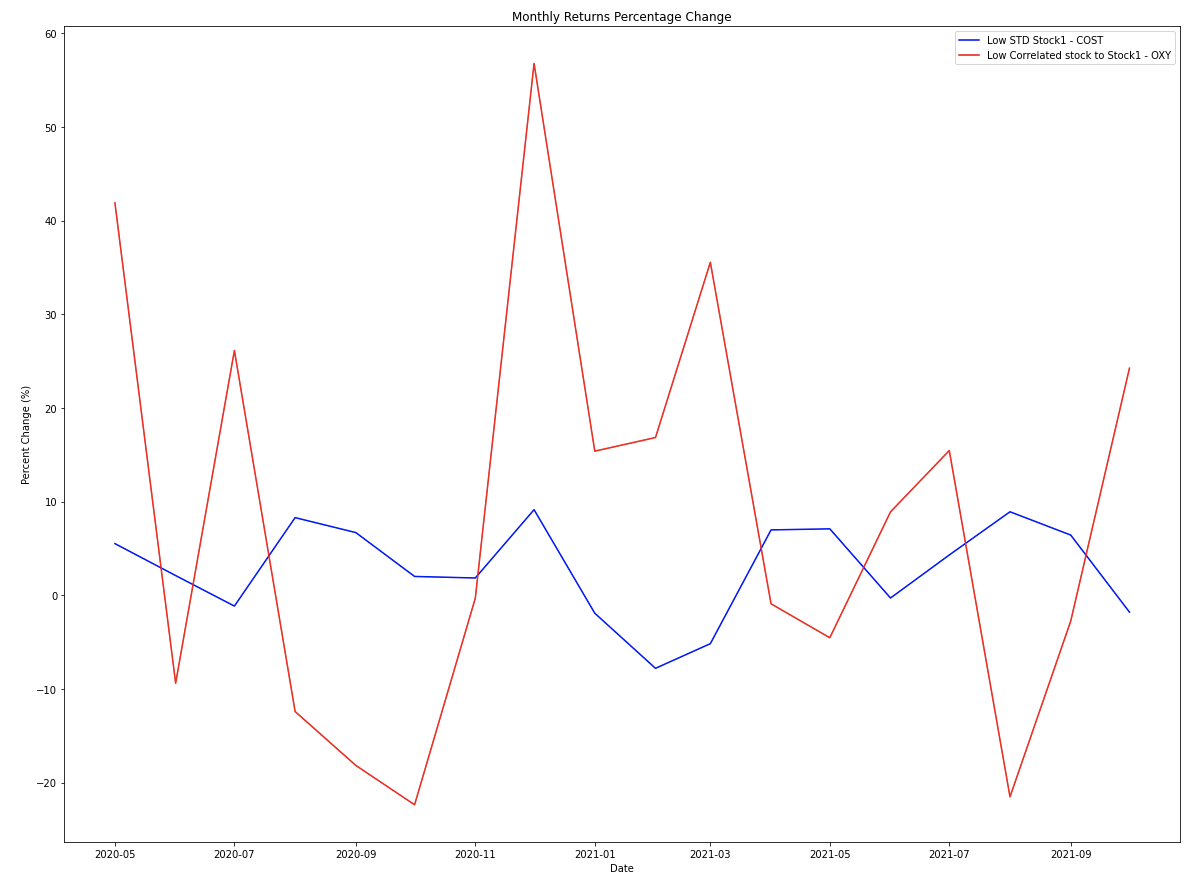

COST has a relatively low standard deviation, to an extent where it was compared to several other stocks. OXY was found to have a rather low correlation to COST, which was discovered and saved by looking through all the correlations between COST and the remaining stocks. Visually from the graph, we can notice the two stocks do indeed show periods of disagreement, which is desired as to diversify our portfolio by including more negatively correlated or low correlation stocks.


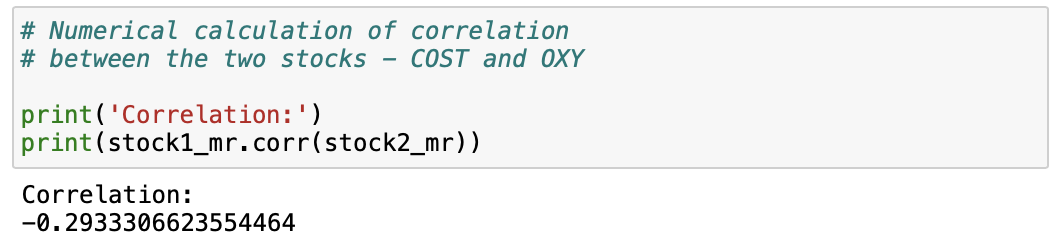

Taking a more numerical look into the relationship, we can see that the correlation actually was negative, at a value of around -0.29 as desired. Having this negative correlation indicates that as one stock moves up or down rapidly, the other one will cancel out that effect. This reduces the risk of the portfolio since the risk can be hedged away and neutralizing the effect. Thus, providing an overall safe portfolio

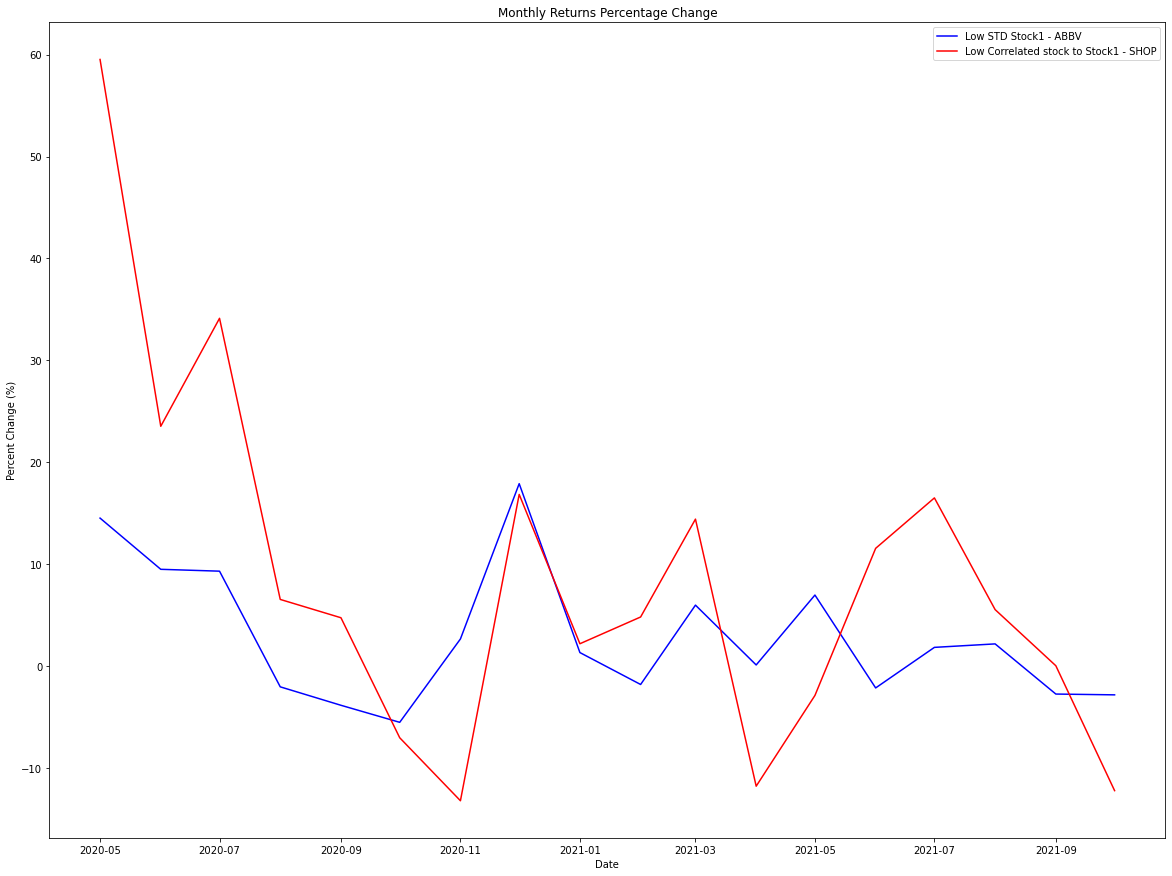

In [21]:
# Graph the monthly returns for the 2 low correlated stocks
# using the first small std stock and the smallest correlated stock found to that one.

plt.figure(figsize=(20,15))

# get the monthly returns percentage change of the desired stocks to compare together
stock1_mr = (stocks_close[stocklist[4]]).resample('MS').first().pct_change()*100
stock2_mr = (stocks_close[stocklist[5]]).resample('MS').first().pct_change()*100

# plot information and set labels
plt.plot(stock1_mr.index, stock1_mr, color='b', label= "Low STD Stock1 - " + stocklist[4])
plt.plot(stock2_mr.index, stock2_mr, color='r', label= "Low Correlated stock to Stock1 - " + stocklist[5])
plt.legend(loc='best')
plt.title('Monthly Returns Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percent Change (%)')

plt.show()

In [22]:
# Numerical calculation of correlation
# between the two stocks - COST and OXY

print('Correlation:')
print(stock1_mr.corr(stock2_mr))

Correlation:
0.6726799935695988


The above code plots a pair of stocks that should show opposing or contradictory behaviour. This demonstrates the diversification of our safe portfolio as we want to have negatively correlated stocks to reduce risk. Calculating the actual correlation coefficient gives a more accurate representation of how the two stocks move relative to each other, and we see that the correlation should be low. An example was provided above but this graph will use two of the stocks from the unknown list (which we will not be able to see and analyze). 

# Filtering Through the Remaining Stocks with Beta Analysis

One measure of risk we can use to figure out how to build a safer portfolio is beta, which measures the volatility of an individual security in relation to the overall market. Ultimately, it measures the correlation between an individual security’s returns and the returns of a chosen market portfolio. The big idea is that the higher the beta is, the riskier the security. So, if the individual security’s returns move more than the market’s as the market’s returns change, the security has MORE volatility than those of the market, and if the security moves less than the market as the market returns change, the security has LESS volatility than the market. Overall, a security with a beta larger than 1.0 is considered volatile while a beta less than 1.0 indicates that the stock’s return has less volatility than the market altogether. 

Thus, when we want to target a safer portfolio, we expect that the securities in there would have a lower beta since we don’t want the individual stock’s returns to change more than the entire market’s. By calculating individual beta measures and comparing them all together to obtain the lower values, it helps to filter through what securities should be safer and contribute to a less volatile portfolio.


In [23]:
#Set dates we want to test for remaining stocks to put into final safe portfolio
pf_start_date = '2021-07-02'
pf_end_date = '2021-10-22'

In [24]:
#function that does the exact same thing as getClose, except
#we use the new dates instead.
def getClose2(stock):
    ticker = yf.Ticker(stock)
    tickhist = ticker.history(start = pf_start_date, end = pf_end_date)
    return tickhist.Close

In [25]:
# Function that computes the portfolio value

def getpvalue(info):
    n = info[0]
    df = info[1]
    sharelist = info[2]
    pvalue = 0
    for i in range(len(sharelist)):
        pvalue += df.iloc[n, i]*sharelist[i]
    return pvalue


The function above, "getpvalue", computes the portfolio value. The info that is passed in is a list with a row number in the 0th position, a DataFrame with close prices in the 1st position, and the number of shares in the 2nd position. "getpvalue" adds the (price * number of shares) for each stock in the row 'n', and returns the sum which would be the total portfolio value.

In [26]:
# makeportfolio - returns pframe 
# sharelist - amount of shares we're purchasing for each stock that we want
# for first 5 stocks, we give them 15k, 10k, 9k, 8k, 8k dollars respectively
# We don't want to weigh one too highly (i.e. 35%) in case it has unexpected behaviour
# otherwise give the rest of the stocks equal weight, splitting $50,000 between the rest

def makeportfolio(stocklist):
    
    #Used later to avoid duplicate stocks
    #If a duplicate stock is found, the stocklist
    #passed in is [0], so we return a dataframe with
    #just 0. Otherwise, we make a portfolio below
    if (stocklist[0] == 0):
        return pd.DataFrame({'Empty': [0]})
    
    #Creating empty DataFrame that we will return
    pframe = pd.DataFrame({})
    
    #Getting the close prices of all the stocks with 
    #the getClose2 function and threading. 
    Closelist = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(getClose2, stocklist)
    
        for result in results:
            Closelist.append(result)
    
    #Iterating through the stock_list and adding the close
    #prices for the dates 
    for i in range(len(stocklist)):
        pframe["stock{}".format(i)] = Closelist[i]
    
    #NEW CODE
    #Dropping the rows where there is NaN
    pframe = pframe.dropna()
    
    #Getting the number of shares initially bought using the first
    #Close prices and the weights we selected above. When analyzing
    #later, we will simply be using this portfolio where we buy at the
    #first close price and never change again (as that is also what 
    #will happen for us)
    sharelist = []
    for i in range(len(stocklist)):
        if i == 0:
            sharelist.append(15000/pframe['stock{}'.format(i)][0])
        elif i == 1:
            sharelist.append(10000/pframe['stock{}'.format(i)][0])
        elif i == 2:
            sharelist.append(9000/pframe['stock{}'.format(i)][0])
        elif i <= 4:
            sharelist.append(8000/pframe['stock{}'.format(i)][0])
        else:
            sharelist.append(50000/((len(stocklist)-5)*pframe['stock{}'.format(i)][0]))
    
    #Creating appropriate list such that the elements
    #can be used with threading and the getpvalue function
    #Note that the first element of the elements of the lists
    #are just the row numbers of pframe (numerically not the dates)
    ilist = []
    for i in range(len(pframe)):
        ilist.append([i, pframe, sharelist])
    
    #Using threading and getpvalue on the ilist, to the
    #portfolio value for all the rows into the list plist
    plist = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(getpvalue, ilist)
    
        for result in results:
            plist.append(result)    
    
    #Inserting plist into pframe as the column 'pvalue'
    pframe.reset_index(inplace=True)
    pframe['pvalue'] = pd.Series(plist)
    pframe.set_index('Date', inplace=True)
    
    #Returning the final Dataframe
    return(pframe)

In [27]:
#Getting info on '^GSPC', which is the S&P 500
#which we will be using for our beta function.
#We predefine it here as to not call .history
#so many times 

MarketIndex = '^GSPC'
start_date_beta = '2021-07-02'
end_date_beta = '2021-10-22'
IndexReturns = yf.Ticker(MarketIndex).history(start=start_date_beta, end=end_date_beta).Close.pct_change()

In [28]:
# get beta of portfolio made from that
# takes the beta of pvalue compared to gspc

def getbeta(pf):
    
    #Again, like in makeportfolio above, if a duplicate stock
    #is given, then a portfolio with 0 in the [0,0] position will
    #be passed in. Otherwise, as the first column should contain
    #the price of the first stock on the first date, it should not
    #be 0, and will go to the next part. We return 100 as we are selecting
    #the smallest betas later, and there is no way we will select 100 unless
    #all the betas are greater than 100 (which is highly unlikely). This means
    #we will not be selecting any duplicate stocks
    if pf.iloc[0,0] == 0:
        return 100
    
    #Creating a df with both the pvalue of the dataframe passed in and the
    #index retuns of the S&P 500
    comparedf = pd.DataFrame({'pvalue': pf.pvalue.pct_change(), '^GSPC' : IndexReturns})
    #Dropping the first row as it would be NaN
    comparedf.drop(index = comparedf.index[0], inplace = True)
    
    #Getting the market variance in order to calculate beta
    MarketVar = comparedf[MarketIndex].var()
    #Returning the beta of the stock relative to S&P 500
    return (comparedf.cov()/MarketVar).iloc[0, 1]

In [29]:
#function that makes a new list by appending a stock
#to a stocklist. The info passed in contains an index, 
#a stocklist and an index list. We first copy the stocklist
#and then, if the index is in indlist we give [0], which is
#dealt with as explained above. Otherwise, we append the stock
#that is indexed by i to the stocklist and return the new list. 
def makelist(info):
    i = info[0]
    stocklist = info[1]
    indlist = info[2]
    testlist = stocklist.copy()
    if isin(i, indlist):
        testlist = [0]
    else:
        testlist.append(filter_list[i])
    return testlist

In [30]:
#Creating list of successive betas for graphing later
betalist = [getbeta(makeportfolio(stocklist))]

In [31]:
# How to select remaining stocks

for k in range(10):
    
    #Getting the beta of our current list of stocks
    testb = getbeta(makeportfolio(stocklist))
    #Setting dfault index in case no appropiate new index
    #is found
    index = -40
    
    #Creating appropriate list that can be passed into the next part
    #which uses makelist
    ilist = []
    for i in range(len(filter_list)):
        ilist.append([i, stocklist, indlist])
    
    #Using threading and makelist on ilist, so we get a list such that the element in the
    #ith position is the stocklist with the ith stock (from filter_list) added
    #if the ith stock isn't already in the list
    testlist = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(makelist, ilist)
    
        for result in results:
            testlist.append(result)
    
    #Using threading and makeportfolio on the testlist to get the portfolios
    #for all the lists in test list
    plist = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(makeportfolio, testlist)
    
        for result in results:
            plist.append(result)
    
    #Using threading and getbeta on the plist to get a list
    #of all the betas of the portfolios (or 100) if the index 
    #corresponds to a stock already in the list
    blist = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(getbeta, plist)
    
        for result in results:
            blist.append(result)
    
    #Finding the minimum beta out of all the newly created portfolios
    minbeta = min(blist)
    #Getting the index of the stock that was added to get the minbeta
    minind = blist.index(minbeta)
    
    #If it is less than testb, then we save the 
    #new index and minbeta
    if minbeta < testb:
        index = minind
        testb = minbeta
    
    
    #If the index is still -40, that means none of the 
    #remaining stocks drop the beta, so we stop adding them
    #Otherwise, we do the things inside
    if index != -40:
        #Adding the chosen index to the indlist
        indlist.append(index)
        #Adding the correspond ticker to the stocklist
        stocklist.append(filter_list[index])
        #Appending the new minbeta to the betalist
        #for graphing purposes later
        betalist.append(minbeta)
    else:
        break
        

### Analyzing Beta and Graph Example


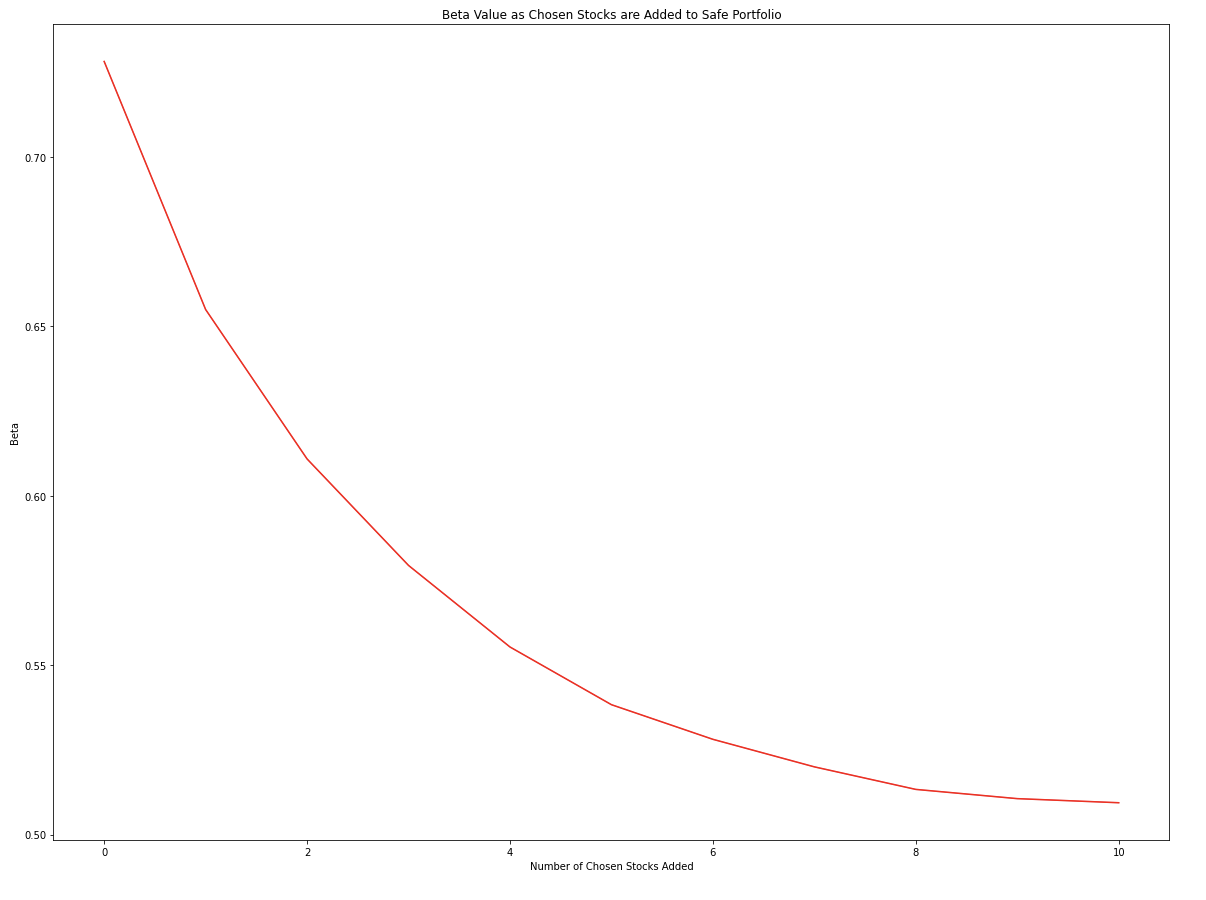

The above is an example of how we would use our functions and filtering to select stocks which would decrease our overall beta as the overall portfolio changes when adding certain stocks. It was a result of us running our code with the Tickers file given (with a few edits for testing). The graph shows how the less risky stocks we added lowered the systematic risk of the portfolio compared to the overall market.

As our Beta graph shows that when more desired stocks are added to the portfolio we see an exponential decrease in Beta value. A lower Beta value is associated with smaller volatility relative to the overall market. If a portfolio moves less than the market, the portfolio’s beta is less than 1.0. By having this numerical measure to depict where our portfolio stands, we see that our portfolio poses fewer risks but also lower returns, which is what a safe portfolio expects to have. Through statistical analysis tools such as Beta, we can better filter out our data to achieve the optimal portfolio. 

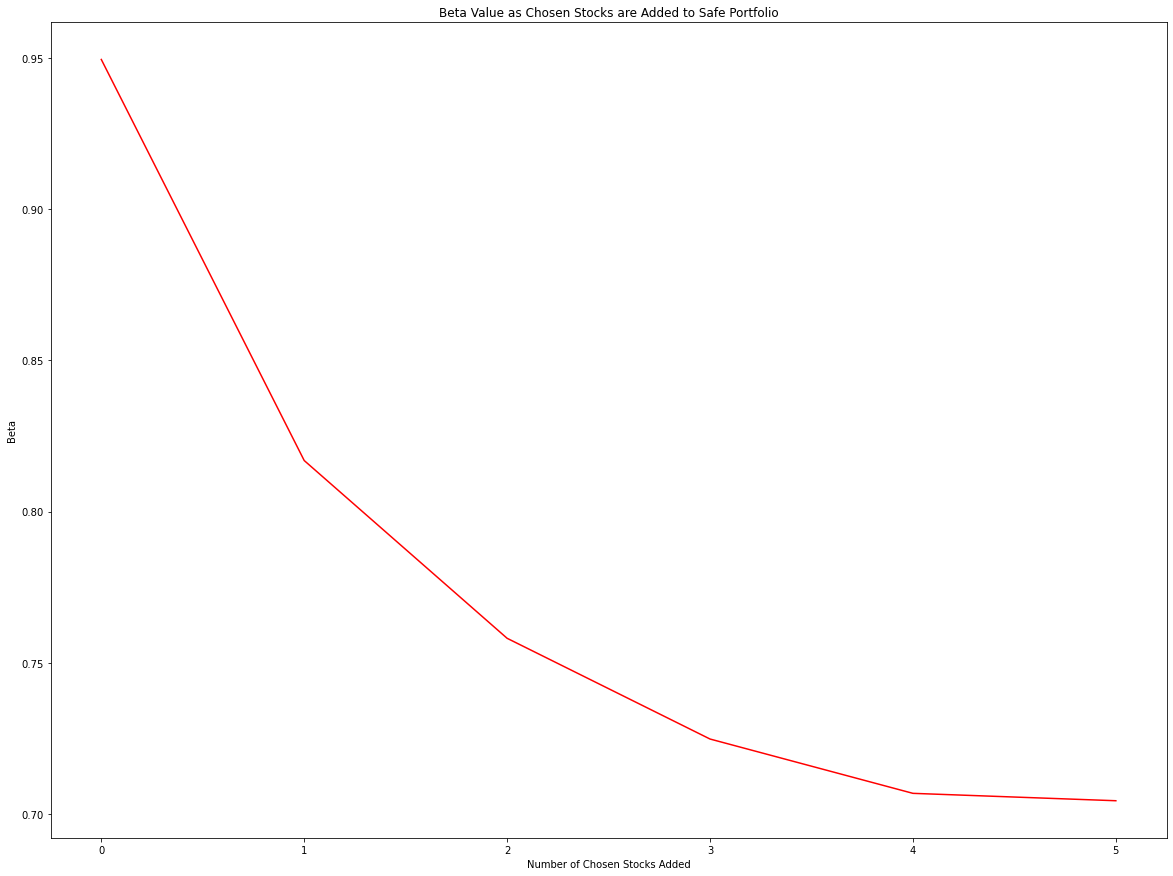

In [32]:
# Graph how the beta of the portfolio changes as we include more stocks from our filtering

plt.figure(figsize=(20,15))

plt.plot(list(range(0,(len(betalist)))), betalist, color='r')
plt.title('Beta Value as Chosen Stocks are Added to Safe Portfolio')
plt.xlabel('Number of Chosen Stocks Added')
plt.ylabel('Beta')

plt.show()

The above graph represents the relationship between the overall beta and the number of stocks for the portfolio we make with the unknown Tickers csv. Observe that this relationship should be inversely proportional as the example above, i.e. as more stocks are added, we have a lower beta.

## Final Portfolio Details


In [33]:
#Setting appropriate dates in order to get close prices
#on 2021-11-26, which will be when we buy the stocks
buyday = '2021-11-26'
nextday = '2021-11-27'

In [34]:
#making final stock dataframe

#Getting the close prices on 11-26 for all of the stocks in our chosen list
pricelist = []
for i in range(len(stocklist)):
    pricelist.append(yf.Ticker(stocklist[i]).history(start=buyday, end = nextday).Close[0])

#Using the same weighting scheme as above to get the number of shares we
#will buy of each stock.
sharelist = []
for i in range(len(pricelist)):
    if i == 0:
        sharelist.append(15000/pricelist[i])
    elif i == 1:
        sharelist.append(10000/pricelist[i])
    elif i == 2:
        sharelist.append(9000/pricelist[i])
    elif i <= 4:
        sharelist.append(8000/pricelist[i])
    else:
        sharelist.append(50000/((len(pricelist)-5)*pricelist[i]))

### Monthly % Returns VS Expected Returns - “Risk-Return Trade-Off”

Another aspect we can analyze is the expected returns of a portfolio. The risk-return tradeoff says that as risk increases, the potential return increases as well. Thus, we can also use this principle to conclude that low levels of risk could translate to lower potential returns. Ultimately, with the risk-return tradeoff, we can understand that our expected monthly returns will be lower since we are trying to create an incredibly safe portfolio. We would also expect that the daily returns don't fluctuate greatly and stay within a small range. 

Below is an example of a Safe Portfolio's Daily Returns and the expected daily returns (red line). The portfolio below was made again using the Tickers file given to us (with a few edits). We can see that the expected daily returns in incredibly low and close to zero, which makes sense by the risk-return trade-off principle. Also, note that the percent change barely goes past 1% and -1%, showing how little it fluctuates and further emphasizes the safety of the portfolio.

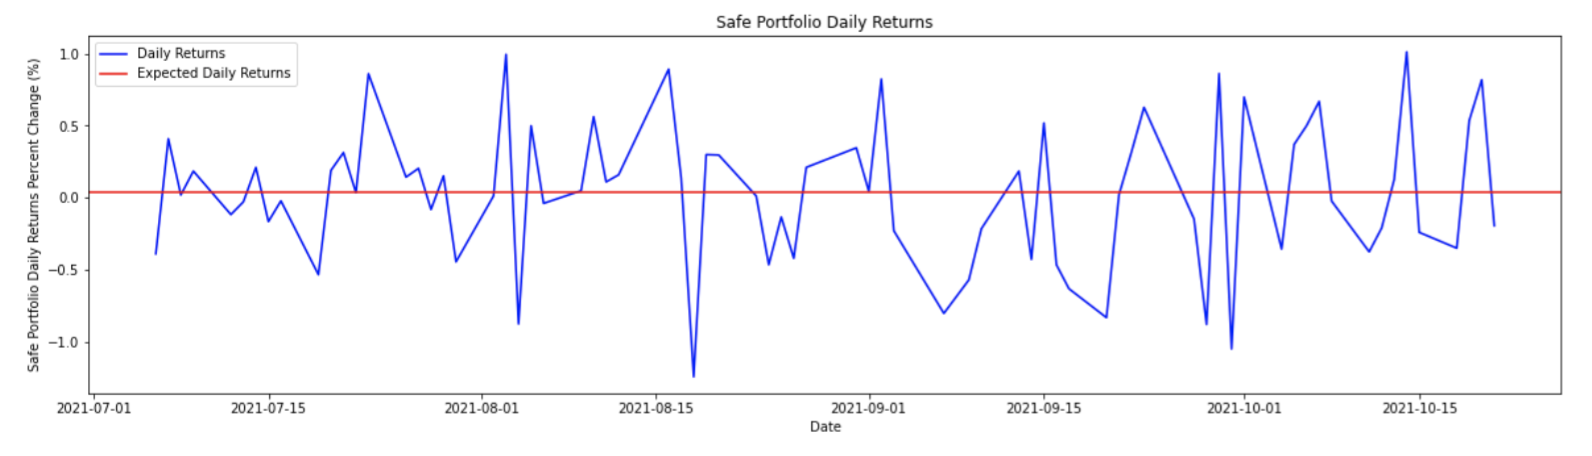

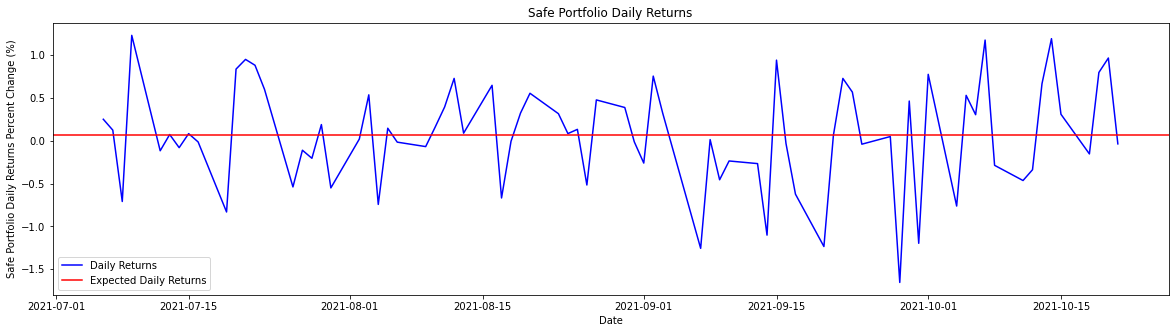

In [35]:
portfolio_returns = makeportfolio(stocklist)
portfolio_returns['Daily Returns'] = portfolio_returns.pvalue.pct_change()*100

# Graph the monthly returns of our portfolio

plt.figure(figsize=(20,5))

plt.plot(portfolio_returns.index, portfolio_returns['Daily Returns'], color='b', label='Daily Returns')

# plto line for the expected daily returns
exp_dreturns = portfolio_returns['Daily Returns'].mean()
plt.axhline(y=exp_dreturns, color='r', linestyle='-', label='Expected Daily Returns')

plt.title('Safe Portfolio Daily Returns')
plt.xlabel('Date')
plt.ylabel('Safe Portfolio Daily Returns Percent Change (%)')
plt.legend(loc='best')

plt.show()

Now, we create a graph (above) to visually analyze and understand the behaviour of the safe portfolio made with the unknown tickers. We expect that the expected returns should be quite minimal, and the percentage change of the daily returns also shouldnot reach large numbers.

# Creating the Final Portfolio

In [36]:
#Creating our final portfolio with what we have so far, which are
#the tickers that we are using, the prices for them on 11-26 and the
#number of shares that we plan on buying for all of them
FinalPortfolio = pd.DataFrame({'Ticker': stocklist, 'Price': pricelist, 'Shares': sharelist})

#Adding a column for Value by multiplying the price by the number of shares that we bought
FinalPortfolio['Value'] = FinalPortfolio.Price*FinalPortfolio.Shares

#Adding a column for weight by calculatiing the total value and then 
#dividing the individual values by the total values and multiplying by
#100 to get a percent weight for eachof the stocks
TotalValue = FinalPortfolio.Value.sum()
FinalPortfolio['Weight'] = 100*FinalPortfolio.Value/FinalPortfolio.Value.sum()

#Changing the indices to start at 1 rather than 0 as specified in the 
#Assignment sheet
FinalPortfolio[''] = FinalPortfolio.index+1
FinalPortfolio.set_index('', inplace=True)

In [37]:
#Creating new row to show total value and total weight
#as asked for in the assignment
totals = pd.DataFrame({'': ['Totals'], 'Ticker': ['N/A'], 'Price': ['N/A'], 'Shares': ['N/A'], 'Value': [FinalPortfolio.Value.sum()], 'Weight': [FinalPortfolio.Weight.sum()]})
totals.set_index('', inplace=True)

In [38]:
#Displaying the finalportfolio with the new row
#appended to the bottom (note that we don't actually
#append it to the variable so we can create 
#the final csv below, we just append it here to display)
FinalPortfolio.append(totals)

,Ticker,Price,Shares,Value,Weight
,,,,,
1,VZ,51.799999,289.575294,15000.000000,15.000000
2,PEP,161.139999,62.057838,10000.000000,10.000000
3,COST,546.130005,16.479593,9000.000000,9.000000
4,SO,62.040001,128.949063,8000.000000,8.000000
5,ABBV,116.510002,68.663633,8000.000000,8.000000
6,SHOP,1576.699951,4.530258,7142.857143,7.142857
7,BMBL,33.830002,211.139721,7142.857143,7.142857
8,IBM,115.809998,61.677379,7142.857143,7.142857
9,LOW,247.690002,28.83789,7142.857143,7.142857


In [39]:
#Getting a new DataFrame
Stocks = pd.DataFrame()

#Getting the columns we want from Final Portfolio
Stocks['Ticker'] = FinalPortfolio['Ticker']
Stocks['Shares'] = FinalPortfolio['Shares']

#Sending it to a csv
Stocks.to_csv('Stocks_Group_08.csv')

<div class="alert alert-block alert-danger">
There were three errors that we fixed in the code. The first was that we didn't check whether the correlations were actually negative when getting stocks that had the minimal correlation with each of our original five stocks. As explained above, we were looking for negative correlations in order to create a safer portfolio, but we didn't actually do that in the code.
    
Secondly, we didn't drop the rows with empty data when using the makeportfolio function. As one of the stocks chosen (HOOD) didn't start trading until recently, it didn't have Close prices in the time period, so there were NaN's in the portfolio, which resulted in the portfolio values being NaN. This means that finding the remaining stocks after selecting the initial 5-10 would not work as the portfolios being compared did not exist.
    
Finally, we forgot to remove the really high standard deviations in our initial filtering, so we added a piece of code that would remove the stocks that have standard deviations that are 4 or higher over the time period we checked. 
</div>

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Vanessa Liu, Ethan Liu, Justin Hui